In [156]:
# 2)

import matplotlib.pyplot as plt
import numpy as np

n = 12

f = lambda x : np.exp(3*x)
F = lambda x : np.exp(3*x)/3
a,b = -1,2

I = F(b)-F(a)

xEven = np.linspace(a,b,num=n+1)
xOdd = np.linspace(a,b,n,endpoint=False) + 1/n
nodes = np.sort(np.concatenate([xEven,xOdd]))

In [157]:
def Composite(f,a,b,n):
    h = (b-a)/(3*n)
    xEven = np.linspace(a,b,num=n+1)
    xOdd = np.linspace(a,b,n,endpoint=False) + h
    nodes = np.sort(np.concatenate([xEven,xOdd]))
    return (h/16)*(22*f(nodes[0]) + 
                   27*np.sum(f(nodes[2:2*n-1:2])) +
                   26*np.sum(f(nodes[2:2*n:2]/2 + nodes[1:2*n-1:2]/2)) -
                   5*np.sum(f(nodes[0:2*n:2]*2 - nodes[1:2*n:2])) +
                   5*f(nodes[n]))
def CompositeMidpoint(f,a,b,n):
    h = (b-a)/(n+1)  # this is \tilde{h} in the notes
    nodes = np.arange( a+h/2, b, step=h)
    return h*np.sum(f(nodes))
def CompositeTrapezoidal( f, a, b, n):
    nodes, h = np.linspace(a,b,n+1,retstep=True)
    y  = f(nodes)
    return h*( np.sum(y) - (y[0]+y[-1])/2) 
def CompositeSimpson( f, a, b, n):
    n = int(n/2)*2  # Make it even
    nodes, h = np.linspace(a,b,n+1,retstep=True)
    y = f(nodes)
    return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] )

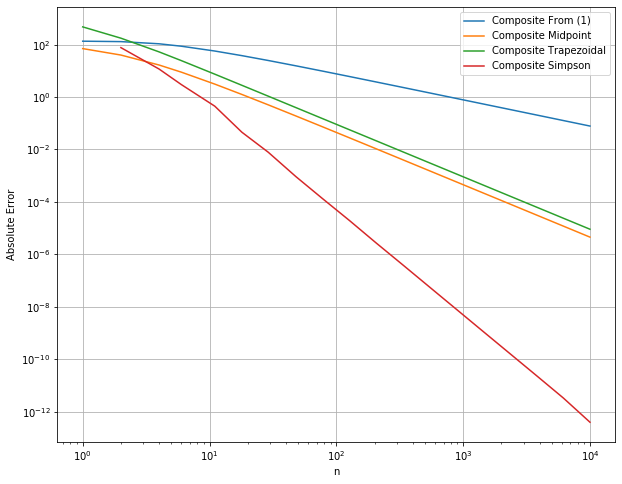

In [158]:
nVals = np.logspace(0,4,20).astype(int)
err = []
errMid = []
errTrap = []
errSimp = []
for n in nVals:
    I_est = Composite(f,-1,2,n)
    err.append(abs(I_est-I))
    I_est = CompositeMidpoint(f,-1,2,n)
    errMid.append(abs(I_est-I))
    I_est = CompositeTrapezoidal(f,-1,2,n)
    errTrap.append(abs(I_est-I))
    I_est = CompositeSimpson(f,-1,2,n)
    errSimp.append(abs(I_est-I))
plt.figure(figsize=(10,8))
plt.loglog(nVals,err,label='Composite From (1)')
plt.loglog(nVals,errMid,label='Composite Midpoint')
plt.loglog(nVals,errTrap,label='Composite Trapezoidal')
plt.loglog(nVals,errSimp,label='Composite Simpson')
plt.ylabel('Absolute Error')
plt.xlabel('n')
plt.grid()
plt.legend()

In [159]:
# 3)

f3 = lambda x: np.cos(x)
F3 = lambda x: np.sin(x)
a,b = 0,50

I = F3(b)-F3(a)
#we will have 12 rows up to 4096 nodes

def RombergForMidpoint(f,a,b,nRows):
    n = 1
    table = []
    for i in range(nRows):
        I = CompositeMidpoint(f,a,b,n)
        newRow = [I]
        if i > 0:
            oldRow = table[-1]
        for j in range(i):
            qj = 4**(j+1)
            newRow.append(  (qj*newRow[-1] - oldRow[j])/( qj-1) )
        table.append(newRow)
        n *= 2
    return table

table = RombergForMidpoint(f3,a,b,13)

print('Absolute Error for table elements')
nt = 1
for row in table:
    print("n=" + str(nt), end=": ")
    nt *= 2
    for entry in row:
        print("{:.2e}  ".format(abs(entry-I)),end="") # suppress new line
    print("") # new line

Absolute Error for table elements
n=1: 4.97e+01  
n=2: 2.20e+00  1.95e+01  
n=4: 1.63e+00  2.91e+00  4.40e+00  
n=8: 1.79e+00  2.92e+00  3.31e+00  3.44e+00  
n=16: 1.25e-01  4.28e-01  6.52e-01  7.14e-01  7.31e-01  
n=32: 2.69e-02  5.96e-03  2.22e-02  3.29e-02  3.58e-02  3.66e-02  
n=64: 6.58e-03  1.86e-04  1.99e-04  1.50e-04  2.79e-04  3.14e-04  3.23e-04  
n=128: 1.65e-03  5.39e-06  1.81e-05  1.52e-05  1.59e-05  1.62e-05  1.63e-05  1.63e-05  
n=256: 4.14e-04  2.47e-06  2.28e-06  2.02e-06  1.97e-06  1.96e-06  1.95e-06  1.95e-06  1.95e-06  
n=512: 1.04e-04  4.24e-07  2.88e-07  2.56e-07  2.49e-07  2.48e-07  2.47e-07  2.47e-07  2.47e-07  2.47e-07  
n=1024: 2.60e-05  6.04e-08  3.61e-08  3.21e-08  3.13e-08  3.11e-08  3.10e-08  3.10e-08  3.10e-08  3.10e-08  3.10e-08  
n=2048: 6.51e-06  8.01e-09  4.52e-09  4.02e-09  3.91e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  
n=4096: 1.63e-06  1.03e-09  5.66e-10  5.03e-10  4.89e-10  4.86e-10  4.85e-10  4.85e-10  4.85e-10  4

In [160]:
# 4) b) 

# code for k=1 fourier coefficient for this particular f
f4 = lambda x: np.exp(-x*1j)/(2*np.pi*(1+0.5*np.cos(x)))
I4 = 2-4/np.sqrt(3)

In [161]:
#re-use nVals
nVals = np.logspace(0,4,30).astype(int)

errMid = []
errTrap = []
errSimp = []
for n in nVals:
    I_est = np.real(CompositeMidpoint(f4,-np.pi,np.pi,n))
    errMid.append(abs(I_est-I4))
    I_est = np.real(CompositeTrapezoidal(f4,-np.pi,np.pi,n))
    errTrap.append(abs(I_est-I4))
    I_est = np.real(CompositeSimpson(f4,-np.pi,np.pi,n))
    errSimp.append(abs(I_est-I4))

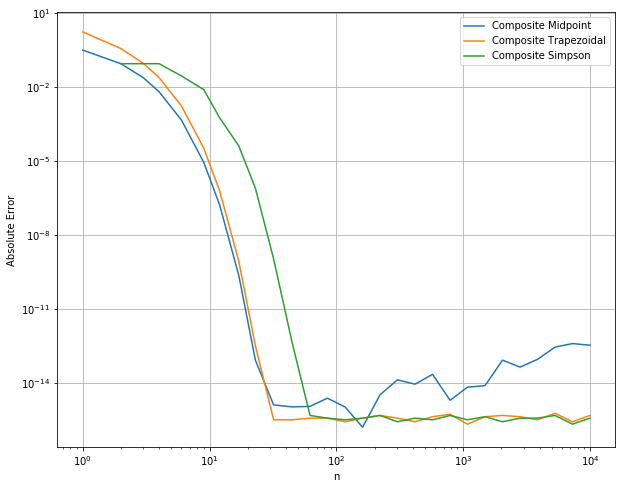

In [162]:
plt.figure(figsize=(10,8))
plt.loglog(nVals,errMid,label='Composite Midpoint')
plt.loglog(nVals,errTrap,label='Composite Trapezoidal')
plt.loglog(nVals,errSimp,label='Composite Simpson')
plt.ylabel('Absolute Error')
plt.xlabel('n')
plt.grid()
plt.legend()